In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
QBtrain = pd.read_csv('TrainingBig/QBtrain.csv')
QBtrain.columns

Index(['Unnamed: 0', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'Third

In [5]:
QBtrain = QBtrain.drop('Unnamed: 0', axis=1)

In [4]:
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,...,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,19.548188,30.691233,59.781149,223.412351,6.899885,1.381912,0.714657,85.206313,2.773725,11.428592,...,55.511927,6.180849,14.901548,86.189794,63.095356,238.538818,6.782741,10.743979,1.577541,88.158257
std,7.383635,10.939082,16.479511,86.527073,2.208274,0.791808,0.525759,26.382373,1.960820,12.210408,...,8.624861,1.292997,2.251992,112.722717,3.392365,24.066005,0.596408,0.750214,0.367753,9.163722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,34.800000,3.000000,10.500000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,17.702381,29.000000,59.390659,195.000000,6.500000,1.000000,0.333333,78.580714,1.400000,2.000000,...,50.000000,5.400000,13.300000,34.000000,60.600000,224.875000,6.400000,10.200000,1.312500,82.000000
50%,21.387500,33.333333,63.570833,244.154762,7.271429,1.400000,0.679487,90.371667,2.333333,7.500000,...,55.300000,6.150000,14.400000,35.562500,63.200000,237.500000,6.800000,10.700000,1.555556,88.000000
75%,24.111111,37.200000,67.108482,274.687500,7.911111,2.000000,1.000000,99.432083,3.750000,17.258929,...,60.000000,7.000000,16.400000,39.062500,64.800000,251.250000,7.200000,11.200000,1.875000,94.000000
max,39.000000,53.000000,100.000000,439.000000,22.000000,5.000000,4.000000,158.330000,14.000000,104.000000,...,87.500000,10.100000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.812500,121.000000


In [5]:
QBtrain.head()

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [6]:
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts',

In [6]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score

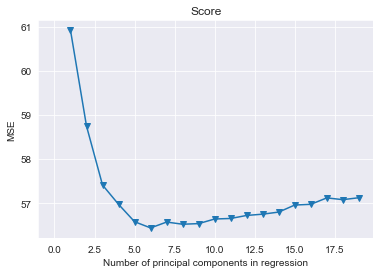

In [8]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [7]:
Offense = pd.read_csv('Input/Offense/Offense.csv')
Offense = Offense.set_index('Team')
Offense.head()


,PointsPerGame,Score,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,...,OpponentTacklesForLossPercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
SF,23.0,230,633,3565,5.6,216,121,39.7,32,46.9,...,27.6,8.9,19.4,319,62.1,2229,7.0,11.3,17,85
CHI,29.9,269,561,3271,5.8,192,112,42.9,32,65.6,...,18.6,5.8,11.7,290,65.5,2190,7.6,11.5,19,100
CIN,26.1,235,524,3038,5.8,183,96,38.5,27,77.8,...,27.6,5.9,10.0,319,63.6,2186,6.9,10.8,18,89
BUF,13.7,137,634,2686,4.2,160,143,30.8,19,57.9,...,26.1,9.7,18.5,317,55.8,1598,5.0,9.0,5,54
DEN,22.8,205,576,3394,5.9,189,116,35.3,26,53.8,...,19.5,6.8,17.2,331,63.7,2254,6.8,10.7,12,83


In [8]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [9]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [10]:
QBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [11]:
RBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [12]:
WROffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [13]:
Def = pd.read_csv('Input/Defense/Def.csv')
Def['Opponent'] = Def['Team']
Def = Def.drop('Team', axis=1)
Def = Def.set_index('Opponent')
Def.head()

,OpponentPointsPerGame,OpponentScore,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,TacklesForLossPercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Opponent,,,,,,,,,,,,,,,,,,,,,
SF,26.6,266,633,3442,5.4,203,133,37.6,40,57.5,...,23.4,6.6,15.2,356,60.4,2420,6.8,11.3,21,98
CHI,19.4,175,577,2876,5.0,164,125,34.4,19,68.4,...,25.7,8.2,15.8,337,62.6,2120,6.3,10.0,17,78
CIN,32.0,288,644,4091,6.4,238,130,56.2,35,68.6,...,14.5,5.4,14.4,368,66.8,2820,7.7,11.5,21,97
BUF,25.1,251,611,3022,4.9,187,131,38.2,31,67.7,...,29.0,7.0,16.2,334,64.4,2024,6.1,9.4,14,85
DEN,23.7,213,571,3276,5.7,169,120,37.5,29,58.6,...,21.5,8.6,17.5,297,63.0,2092,7.0,11.2,16,91


In [14]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [15]:
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [16]:
QBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [17]:
RBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [18]:
QB = pd.read_csv('Input/Aggregate/QBAggregate.csv')
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()

,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,23.100000,34.500000,67.0,315.000000,9.1,3.100000,0.700000,117.42,3.600000,15.800000,4.4,0.200000,29.5
Matt Ryan,ATL,2,27.888889,39.222222,71.1,335.000000,8.5,2.333333,0.333333,113.21,2.111111,8.888889,4.2,0.222222,26.8
Jared Goff,LAR,3,22.700000,33.200000,68.4,313.400000,9.4,2.200000,0.600000,112.95,3.100000,8.200000,2.6,0.000000,24.0
Ben Roethlisberger,PIT,4,27.111111,41.000000,66.1,320.888889,7.8,2.333333,0.777778,100.86,2.222222,8.333333,3.8,0.222222,25.8
Mitch Trubisky,CHI,5,21.111111,32.222222,65.5,256.000000,7.9,2.111111,0.777778,101.57,4.555556,35.555556,7.8,0.333333,24.8


In [19]:
QBRZ = pd.read_csv('Input/RZ/QBRZ.csv')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,4.000000,6.100000,65.6,32.500000,5.3,2.200000,0.100000,111.68,0.900000,2.900000,3.2,0.200000,11.5
Andrew Luck,4.444444,7.333333,60.6,33.111111,4.5,2.333333,0.111111,104.67,0.333333,1.555556,4.7,0.000000,11.1
Drew Brees,5.111111,7.333333,69.7,31.444444,4.3,1.777778,0.000000,117.61,0.555556,1.333333,2.4,0.333333,10.7
Cam Newton,2.444444,3.333333,73.3,19.777778,5.9,1.333333,0.000000,127.50,1.444444,5.444444,3.8,0.444444,9.8
Jared Goff,3.900000,6.100000,63.9,28.900000,4.7,1.600000,0.200000,101.02,0.500000,0.600000,1.2,0.000000,8.0


In [20]:
QBsnaps = pd.read_csv('Input/Aggregate/QBSnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jeff Driskel,CIN,QB,2,16,8.0,2.9,18.8,0.0,62.5,62.5,13.36,83.5
1,2,Patrick Mahomes,KC,QB,10,643,64.3,100.0,5.6,0.0,59.3,59.3,294.80,45.8
2,3,Ryan Fitzpatrick,TB,QB,7,387,55.3,59.9,8.3,0.0,66.4,66.4,179.76,46.4
3,4,Cam Newton,CAR,QB,9,568,63.1,98.8,13.2,0.0,64.6,64.6,212.64,37.4
4,5,Matt Ryan,ATL,QB,9,609,67.7,98.5,3.1,0.0,61.1,61.1,241.60,39.7


In [21]:
QBsnaps = QBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
QBsnaps = QBsnaps.set_index('Name')

In [22]:
Defense = pd.read_csv('Input/Defense/Defense.csv')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
BAL,17.40
JAX,17.27
TEN,17.06
BUF,14.41
MIN,18.47


In [23]:
QBSalaries = pd.read_csv('Input/Salaries/QBSalaries.csv').dropna()
QBSalaries = QBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
QBSalaries = QBSalaries.set_index('Opponent')
QBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
LAR,Patrick Mahomes,KC,7100.0,28.03
KC,Jared Goff,LAR,6400.0,25.62
DAL,Matt Ryan,ATL,6100.0,23.81
DET,Cam Newton,CAR,6200.0,23.79
PHI,Drew Brees,NO,6500.0,21.28


In [24]:
Vegas = pd.read_csv('Input/Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Home,PointSpread,OverUnder,total
Team,,,,
SEA,True,-2.5,49.0,25.75
HOU,False,-2.5,42.5,22.50
NYG,True,-2.0,52.0,27.00
CAR,False,-3.5,51.0,27.25
IND,True,-2.0,48.0,25.00


In [25]:
QBSalaries = QBSalaries.join(QBDef).join(QBDefense)
QBSalaries = QBSalaries.set_index('Team').join(Vegas).join(QBOffense)
QBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Josh Rosen,4800.0,15.91,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
ARI,Mike Glennon,4500.0,0.19,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
ATL,Matt Ryan,6100.0,23.81,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.7
ATL,Matt Schaub,4400.0,0.06,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.7
BAL,Lamar Jackson,4700.0,12.08,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,...,71.100000,367.071831,5.2,23.254930,14.687324,45.5,3.671831,66.7,4.2,10.5


In [26]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,15.91,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
Mike Glennon,4500.0,0.19,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
Matt Ryan,6100.0,23.81,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.7
Matt Schaub,4400.0,0.06,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.7
Lamar Jackson,4700.0,12.08,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,71.100000,367.071831,5.2,23.254930,14.687324,45.5,3.671831,66.7,4.2,10.5


In [27]:
QBs = QBSalaries.join(QBavg).join(QBRZ).join(QBsnaps).dropna()
QBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,15.91,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.000000,3.0,55.3,74.1,2.6,0.0,56.3,56.3,18.6
Matt Ryan,6100.0,23.81,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,4.5,0.222222,8.6,67.7,98.5,3.1,0.0,61.1,61.1,39.7
Matt Schaub,4400.0,0.06,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,0.000000,0.0,5.0,1.6,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,4700.0,12.08,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,4.1,0.111111,1.1,9.7,12.9,32.2,2.3,46.0,48.3,31.5
Joe Flacco,5300.0,6.90,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,0.0,0.000000,5.0,71.1,95.1,3.0,0.0,62.2,62.2,23.5


In [28]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test

,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,3.886029,51.4,...,0.0,0.000000,3.0,55.3,74.1,2.6,0.0,56.3,56.3,18.6
Matt Ryan,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,3.000000,48.1,...,4.5,0.222222,8.6,67.7,98.5,3.1,0.0,61.1,61.1,39.7
Matt Schaub,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,3.000000,48.1,...,0.0,0.000000,0.0,5.0,1.6,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,3.888889,68.6,...,4.1,0.111111,1.1,9.7,12.9,32.2,2.3,46.0,48.3,31.5
Joe Flacco,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,3.888889,68.6,...,0.0,0.000000,5.0,71.1,95.1,3.0,0.0,62.2,62.2,23.5
Cam Newton,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,3.220902,55.2,...,3.8,0.444444,9.8,63.1,98.8,13.2,0.0,64.6,64.6,37.4
Taylor Heinicke,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,3.220902,55.2,...,0.0,0.000000,0.0,3.0,1.0,33.3,0.0,50.0,50.0,5.3
Mitch Trubisky,18.47,22.7,61.312255,322.696078,5.3,19.250490,11.238725,25.7,3.672059,39.4,...,5.2,0.333333,8.9,65.8,99.2,6.9,0.0,55.9,55.9,37.7
Chase Daniel,18.47,22.7,61.312255,322.696078,5.3,19.250490,11.238725,25.7,3.672059,39.4,...,0.0,0.000000,0.0,2.3,1.2,71.4,0.0,71.4,71.4,-7.1


In [29]:
X_test = X_test[X_train.columns]

In [30]:
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)

PLSRegression(copy=True, max_iter=500, n_components=6, scale=True, tol=1e-06)

In [31]:
regr2 = RandomForestRegressor(n_estimators=146, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=None, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=146, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [32]:
PLSProjections = pls.predict(scale(X_test))
QBRFProj = regr2.predict(X_test)

In [33]:
QBs['PLSProjections'] = PLSProjections
QBs['RFProjections'] = QBRFProj
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,15.91,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,3.0,55.3,74.1,2.6,0.0,56.3,56.3,18.6,19.318113,15.335101
Matt Ryan,6100.0,23.81,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,8.6,67.7,98.5,3.1,0.0,61.1,61.1,39.7,22.390199,22.809079
Matt Schaub,4400.0,0.06,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,5.0,1.6,10.0,10.0,90.0,90.0,11.0,11.889209,3.801000
Lamar Jackson,4700.0,12.08,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,1.1,9.7,12.9,32.2,2.3,46.0,48.3,31.5,16.155572,7.504636
Joe Flacco,5300.0,6.90,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,5.0,71.1,95.1,3.0,0.0,62.2,62.2,23.5,23.398034,21.556562
Cam Newton,6200.0,23.79,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,...,9.8,63.1,98.8,13.2,0.0,64.6,64.6,37.4,26.254498,26.205150
Taylor Heinicke,4000.0,0.04,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,...,0.0,3.0,1.0,33.3,0.0,50.0,50.0,5.3,13.265272,3.163354
Mitch Trubisky,5700.0,19.25,18.47,22.7,61.312255,322.696078,5.3,19.250490,11.238725,25.7,...,8.9,65.8,99.2,6.9,0.0,55.9,55.9,37.7,23.128036,20.507398
Chase Daniel,4300.0,0.14,18.47,22.7,61.312255,322.696078,5.3,19.250490,11.238725,25.7,...,0.0,2.3,1.2,71.4,0.0,71.4,71.4,-7.1,8.486208,0.979476


In [36]:
QBs.to_csv('Projections/QBWeek12.csv')

In [34]:
QBScores = pd.read_csv('Scores/QBScores.csv')
QB = pd.DataFrame({'Name': [], 'Score': []})
QB['Name'] = QBScores['Name']
QB['Score'] = QBScores['FantasyPointsDraftKings']
QB = QB.set_index('Name')
QBs = QBs.join(QB)
QBs = QBs.dropna()
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,15.91,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,55.3,74.1,2.6,0.0,56.3,56.3,18.6,19.318113,15.335101,15.44
Matt Ryan,6100.0,23.81,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,67.7,98.5,3.1,0.0,61.1,61.1,39.7,22.390199,22.809079,14.74
Lamar Jackson,4700.0,12.08,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,9.7,12.9,32.2,2.3,46.0,48.3,31.5,16.155572,7.504636,19.70
Cam Newton,6200.0,23.79,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,...,63.1,98.8,13.2,0.0,64.6,64.6,37.4,26.254498,26.205150,28.48
Taylor Heinicke,4000.0,0.04,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,...,3.0,1.0,33.3,0.0,50.0,50.0,5.3,13.265272,3.163354,0.00
Mitch Trubisky,5700.0,19.25,18.47,22.7,61.312255,322.696078,5.3,19.250490,11.238725,25.7,...,65.8,99.2,6.9,0.0,55.9,55.9,37.7,23.128036,20.507398,16.90
Andy Dalton,5000.0,15.40,17.40,17.8,64.080000,305.381250,4.8,18.690000,13.906250,35.2,...,60.2,97.3,2.2,0.0,59.8,59.8,30.1,16.034144,16.462323,19.34
Jeff Driskel,4300.0,0.13,17.40,17.8,64.080000,305.381250,4.8,18.690000,13.906250,35.2,...,8.0,2.9,18.8,0.0,62.5,62.5,83.5,12.854556,9.625647,0.00
Dak Prescott,5200.0,19.68,26.52,28.2,63.283465,414.007087,6.5,24.314173,11.768504,51.9,...,63.3,99.0,8.4,0.2,56.3,56.5,27.7,20.698746,21.680966,14.82


In [35]:
y_test = QBs.Score
y_pred = QBs.PLSProjections
mean_squared_error(y_test, y_pred)

99.27496727082696

In [36]:
y_test = QBs.Score
y_pred = QBs.RFProjections
mean_squared_error(y_test, y_pred)

66.87055496671708

In [37]:
y_test = QBs.Score
y_pred = QBs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

64.94805882352941

In [38]:
y_test = QBs.Score
y_pred = QBs.PointsGame
mean_squared_error(y_test, y_pred)

70.97404705882352

In [41]:
QBs = QBs.reset_index()
QBs.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
0,Josh Rosen,4800.0,15.91,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,55.3,74.1,2.6,0.0,56.3,56.3,18.6,19.318113,16.594,15.44
1,Matt Ryan,6100.0,23.81,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,67.7,98.5,3.1,0.0,61.1,61.1,39.7,22.390199,22.884,14.74
2,Lamar Jackson,4700.0,12.08,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,...,9.7,12.9,32.2,2.3,46.0,48.3,31.5,16.155572,6.292,19.70
3,Cam Newton,6200.0,23.79,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,...,63.1,98.8,13.2,0.0,64.6,64.6,37.4,26.254498,22.758,28.48
4,Taylor Heinicke,4000.0,0.04,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,...,3.0,1.0,33.3,0.0,50.0,50.0,5.3,13.265272,4.626,0.00


In [42]:
QBs = QBs[QBtrain.columns]

In [43]:
QBtrain = QBtrain.append(QBs, ignore_index=True, sort=False)
QBtrain

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
5,Aaron Rodgers,21.714286,35.714286,61.957143,241.357143,6.828571,2.071429,0.428571,96.338571,3.714286,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
6,Nick Foles,18.000000,29.000000,62.566667,214.666667,7.566667,0.666667,0.333333,88.396667,2.000000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
7,Nick Foles,17.500000,30.200000,58.410000,190.600000,6.560000,0.700000,0.900000,77.538000,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
8,Teddy Bridgewater,18.750000,28.916667,64.825000,199.833333,6.850000,0.666667,0.666667,82.226667,2.916667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
9,Sam Bradford,22.818182,36.090909,62.727273,242.181818,6.800000,1.272727,1.000000,85.920909,1.909091,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79


In [44]:
QBtrain.to_csv('QBtrain.csv')

In [39]:
RBtrain = pd.read_csv('TrainingBig/RBtrain.csv')
RBtrain.columns


Index(['Unnamed: 0', 'Name', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'OpponentTacklesForLossPercentage',
       'OpponentPointsPerGame', 'OpponentOffensivePlays',
       'OpponentOffensiveYards', 'OpponentOffensiveYardsPerPlay',
       'OpponentFirstDowns', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZ

In [40]:
RBtrain = RBtrain.drop('Unnamed: 0', axis=1)

In [47]:
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,...,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000
mean,5.873846,24.118057,2.660894,0.167397,1.888867,1.412501,11.619435,0.055249,6.460759,6.803122,...,5.455344,20.016996,13.211577,39.126473,3.125439,55.378007,109.924773,4.170106,19.081164,0.790667
std,6.133924,26.956516,2.124262,0.289866,1.955788,1.514717,13.822263,0.136668,6.519144,8.323319,...,0.412457,1.773364,0.824517,4.134096,0.444001,8.403131,16.145998,0.402261,4.200176,0.266087
min,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-0.700000,-1.800000,...,4.400000,16.062500,10.564655,25.200000,1.750000,34.800000,79.187500,3.300000,10.100000,0.221714
25%,0.500000,1.000000,0.666667,0.000000,0.333333,0.181818,1.000000,0.000000,0.873214,0.000000,...,5.200000,18.804225,12.812500,36.800000,2.812500,50.000000,98.187500,3.900000,16.200000,0.625000
50%,3.591667,14.000000,2.927273,0.000000,1.250000,1.000000,6.666667,0.000000,4.600000,3.700000,...,5.500000,19.937500,13.250000,39.000000,3.187500,55.300000,109.250000,4.100000,19.000000,0.750000
75%,10.138393,40.342857,4.013839,0.250000,3.000000,2.200000,18.000000,0.000000,10.200000,10.500000,...,5.700000,20.959766,13.812500,41.100000,3.437500,60.000000,120.875000,4.400000,21.700000,0.937500
max,31.000000,168.000000,28.000000,3.000000,13.000000,10.000000,129.000000,2.000000,49.600000,55.600000,...,6.700000,26.444444,15.062500,56.200000,4.125000,87.500000,165.812500,5.200000,33.000000,1.562500


In [41]:
X_train = RBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = RBtrain.Score

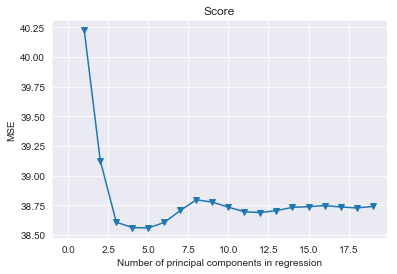

In [54]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [42]:
RB = pd.read_csv('Input/Aggregate/RBAggregate.csv')
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,19.800000,98.800000,5.0,1.300000,5.300000,4.000000,40.200000,0.400000,30.1
Alvin Kamara,NO,2,13.666667,60.666667,4.4,1.222222,7.888889,6.111111,52.555556,0.333333,28.2
James Conner,PIT,3,18.222222,85.666667,4.7,1.111111,5.666667,4.333333,43.000000,0.111111,26.5
Saquon Barkley,NYG,4,14.555556,65.111111,4.5,0.555556,8.444444,6.888889,58.888889,0.222222,24.8
Melvin Gordon,LAC,5,15.625000,84.000000,5.4,0.875000,6.500000,4.500000,45.125000,0.500000,27.7


In [43]:
RB_RZ = pd.read_csv('Input/RZ/RBRZ.csv')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,5.200000,16.700000,3.2,1.300000,1.500000,0.800000,6.900000,0.300000,13.4
Alvin Kamara,4.222222,12.777778,3.0,1.111111,2.222222,1.777778,11.777778,0.333333,13.3
Kareem Hunt,2.500000,6.900000,2.8,0.700000,0.900000,0.600000,5.400000,0.300000,7.8
Melvin Gordon,2.250000,12.500000,5.6,0.750000,1.500000,0.875000,3.500000,0.375000,9.7
James White,1.500000,2.600000,1.7,0.300000,1.500000,1.100000,8.000000,0.600000,7.6


In [44]:
RBsnaps = pd.read_csv('Input/Aggregate/RBSnaps.csv')
RBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Zach Zenner,DET,RB,1,2,2.0,2.6,50.0,0.0,50.0,50.0,1.2,60.0
1,2,Nick Chubb,CLE,RB,10,188,18.8,26.0,50.0,5.3,53.2,55.3,110.7,58.9
2,3,Melvin Gordon,LAC,RB,8,360,45.0,73.5,34.7,14.4,44.7,49.2,221.3,61.5
3,4,Kenneth Dixon,BAL,RB,1,22,22.0,27.5,59.1,0.0,59.1,59.1,10.4,47.3
4,5,Marlon Mack,IND,RB,5,161,32.2,48.9,48.4,8.1,53.4,56.5,89.5,55.6


In [45]:
RBsnaps = RBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
RBsnaps = RBsnaps.set_index('Name')

In [46]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
BAL,17.57
JAX,20.62
TEN,17.60
BUF,27.03
MIN,21.30


In [47]:
RBSalaries = pd.read_csv('Input/Salaries/RBSalaries.csv').dropna()
RBSalaries = RBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
RBSalaries = RBSalaries.set_index('Opponent')
RBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
KC,Todd Gurley,LAR,9600.0,30.20
TB,Saquon Barkley,NYG,8700.0,25.28
PHI,Alvin Kamara,NO,8200.0,23.83
DEN,Melvin Gordon,LAC,8900.0,22.87
DET,Christian McCaffrey,CAR,8000.0,21.99


In [48]:
RBSalaries = RBSalaries.join(RBDef).join(RBDefense)
RBSalaries = RBSalaries.set_index('Team').join(Vegas).join(RBOffense)
RBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,David Johnson,7500.0,20.27,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ARI,Chase Edmonds,3900.0,3.03,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ARI,TJ Logan,3000.0,0.49,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ARI,Derrick Coleman,3000.0,0.30,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ATL,Tevin Coleman,5300.0,14.04,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,27.1,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,31.5


In [49]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7500.0,20.27,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
Chase Edmonds,3900.0,3.03,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
TJ Logan,3000.0,0.49,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
Derrick Coleman,3000.0,0.30,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
Tevin Coleman,5300.0,14.04,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,27.1,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,31.5


In [50]:
RBs = RBSalaries.join(RBavg).join(RBRZ).join(RBsnaps).dropna()
RBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7500.0,20.27,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,1.333333,0.111111,5.8,47.7,82.2,33.3,10.0,40.6,43.4,36.2
Chase Edmonds,3900.0,3.03,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.000000,0.000000,0.1,11.2,19.3,23.8,14.9,36.6,38.6,25.8
TJ Logan,3000.0,0.49,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.000000,0.000000,0.0,1.3,2.2,0.0,50.0,50.0,50.0,85.0
Derrick Coleman,3000.0,0.30,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.000000,0.000000,0.0,4.6,7.9,4.9,4.9,9.8,9.8,9.8
Tevin Coleman,5300.0,14.04,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,5.222222,0.333333,4.4,40.0,58.3,29.4,8.3,35.8,37.8,35.7


In [51]:
X_test = RBs[X_train.columns]
X_test

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,RZattemptsGame,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,15.888889,54.666667,3.4,0.666667,4.777778,3.444444,32.444444,0.222222,17.3,2.222222,...,6.7,19.652206,12.324265,45.9,3.886029,51.4,140.896324,4.8,12.5,0.999265
Chase Edmonds,2.666667,7.555556,2.8,0.000000,1.666667,1.444444,7.000000,0.000000,2.9,0.111111,...,6.7,19.652206,12.324265,45.9,3.886029,51.4,140.896324,4.8,12.5,0.999265
TJ Logan,0.000000,0.000000,0.0,0.000000,0.666667,0.666667,4.666667,0.000000,1.1,0.000000,...,6.7,19.652206,12.324265,45.9,3.886029,51.4,140.896324,4.8,12.5,0.999265
Derrick Coleman,0.222222,0.333333,1.5,0.000000,0.222222,0.222222,1.888889,0.000000,0.4,0.000000,...,6.7,19.652206,12.324265,45.9,3.886029,51.4,140.896324,4.8,12.5,0.999265
Tevin Coleman,11.777778,49.111111,4.2,0.222222,3.333333,2.555556,24.888889,0.444444,14.3,1.444444,...,5.3,18.888889,13.111111,44.1,3.000000,48.1,96.666667,3.6,23.2,0.666667
Ito Smith,5.888889,21.000000,3.6,0.444444,2.222222,1.888889,12.666667,0.000000,7.9,1.666667,...,5.3,18.888889,13.111111,44.1,3.000000,48.1,96.666667,3.6,23.2,0.666667
Brian Hill,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,5.3,18.888889,13.111111,44.1,3.000000,48.1,96.666667,3.6,23.2,0.666667
Ricky Ortiz,0.000000,0.000000,0.0,0.000000,0.375000,0.250000,0.875000,0.000000,0.3,0.000000,...,5.3,18.888889,13.111111,44.1,3.000000,48.1,96.666667,3.6,23.2,0.666667
Devonta Freeman,7.000000,34.000000,4.9,0.000000,3.500000,2.500000,11.500000,0.000000,7.0,1.500000,...,5.3,18.888889,13.111111,44.1,3.000000,48.1,96.666667,3.6,23.2,0.666667


In [52]:
pls = PLSRegression(n_components=5)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

In [53]:
regr2 = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=20, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
RBRFproj = regr2.predict(X_test)

In [54]:
RBs['PLSProjections'] = PLSProjections
RBs['RFProjections'] = RBRFproj
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7500.0,20.27,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,5.8,47.7,82.2,33.3,10.0,40.6,43.4,36.2,16.429089,18.442485
Chase Edmonds,3900.0,3.03,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.1,11.2,19.3,23.8,14.9,36.6,38.6,25.8,4.503269,4.935933
TJ Logan,3000.0,0.49,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,1.3,2.2,0.0,50.0,50.0,50.0,85.0,0.288422,2.507859
Derrick Coleman,3000.0,0.30,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,4.6,7.9,4.9,4.9,9.8,9.8,9.8,1.391292,1.624630
Tevin Coleman,5300.0,14.04,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,4.4,40.0,58.3,29.4,8.3,35.8,37.8,35.7,12.623619,13.841525
Ito Smith,3600.0,9.34,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,3.6,19.9,29.0,29.6,11.2,39.1,40.8,39.8,7.544003,9.774768
Brian Hill,3000.0,0.38,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110221,0.598677
Ricky Ortiz,3000.0,0.11,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,11.0,14.2,0.0,3.4,2.3,3.4,3.1,0.974974,0.671051
Devonta Freeman,3000.0,0.00,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.2,33.5,32.7,20.9,10.4,28.4,31.3,21.0,8.650724,9.911961


In [63]:
RBs.to_csv('Projections/RBWeek12.csv')

In [55]:
RBScores = pd.read_csv('Scores/RBScores.csv')
RB = pd.DataFrame({'Name': [], 'Score': []})
RB['Name'] = RBScores['Name']
RB['Score'] = RBScores['FantasyPointsDraftKings']
RB = RB.set_index('Name')
RBs = RBs.join(RB)
RBs = RBs.dropna()
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7500.0,20.27,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,47.7,82.2,33.3,10.0,40.6,43.4,36.2,16.429089,18.442485,19.4
Chase Edmonds,3900.0,3.03,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,11.2,19.3,23.8,14.9,36.6,38.6,25.8,4.503269,4.935933,1.7
TJ Logan,3000.0,0.49,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,1.3,2.2,0.0,50.0,50.0,50.0,85.0,0.288422,2.507859,0.0
Derrick Coleman,3000.0,0.30,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,4.6,7.9,4.9,4.9,9.8,9.8,9.8,1.391292,1.624630,0.0
Tevin Coleman,5300.0,14.04,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,40.0,58.3,29.4,8.3,35.8,37.8,35.7,12.623619,13.841525,11.5
Ito Smith,3600.0,9.34,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,19.9,29.0,29.6,11.2,39.1,40.8,39.8,7.544003,9.774768,4.2
Brian Hill,3000.0,0.38,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110221,0.598677,0.0
Alex Collins,4400.0,12.42,33.77,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,32.7,43.7,36.4,7.1,41.5,43.5,35.3,12.449648,15.901987,7.8
Javorius Allen,3700.0,6.12,33.77,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,33.6,44.9,12.9,14.2,24.5,27.2,31.2,10.740226,14.590370,0.2


In [56]:
y_test = RBs.Score
y_pred = RBs.PLSProjections
mean_squared_error(y_test, y_pred)

38.06834057662656

In [57]:
y_test = RBs.Score
y_pred = RBs.RFProjections
mean_squared_error(y_test, y_pred)

41.58426737066201

In [58]:
y_test = RBs.Score
y_pred = RBs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

33.00008953488372

In [59]:
y_test = RBs.Score
y_pred = RBs.PointsGame
mean_squared_error(y_test, y_pred)

42.563372093023254

In [68]:
RBs = RBs.reset_index()
RBs = RBs[RBtrain.columns]
RBtrain = RBtrain.append(RBs, ignore_index=True, sort=False)
RBtrain.to_csv('RBtrain.csv')

In [60]:
WRtrain = pd.read_csv('TrainingBig/WRtrain.csv')

In [61]:
WRtrain = WRtrain.drop('Unnamed: 0', axis=1)
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,...,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000
mean,4.962060,3.009023,52.445030,38.539424,0.249585,6.677192,10.415144,0.138261,0.750723,0.581553,...,55.326770,6.182675,14.906773,80.313713,63.087151,238.312672,6.778302,10.738002,1.572850,88.056331
std,3.182322,2.092204,20.365626,28.332924,0.284080,3.226738,5.101521,0.354148,2.388222,1.701648,...,8.432644,1.287264,2.262153,107.025539,3.420941,23.665606,0.593752,0.747667,0.364481,9.221846
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,...,34.800000,3.000000,10.500000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,2.400000,1.272727,42.348798,14.500000,0.000000,4.700000,7.300000,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.000000,60.600000,224.875000,6.400000,10.200000,1.312500,82.000000
50%,4.666667,2.750000,55.953571,34.607692,0.181818,6.885714,10.800000,0.000000,0.000000,0.000000,...,55.300000,6.100000,14.400000,35.375000,63.150000,237.500000,6.800000,10.700000,1.553125,88.000000
75%,7.181818,4.454545,66.405000,57.000000,0.384615,8.700000,13.527597,0.125000,0.111111,0.100000,...,60.000000,7.000000,16.400000,37.937500,64.800000,251.125000,7.200000,11.200000,1.875000,94.000000
max,19.000000,16.000000,100.000000,180.000000,2.000000,26.500000,50.000000,4.000000,31.000000,34.000000,...,87.500000,10.100000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.812500,121.000000


In [62]:
X_train = WRtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = WRtrain.Score

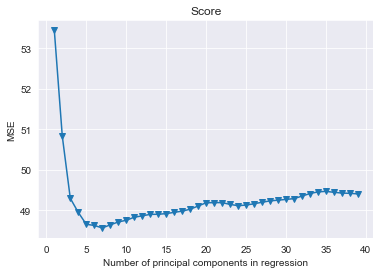

In [72]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 40):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 40), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [63]:
WR = pd.read_csv('Input/Aggregate/WRAggregate.csv')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Adam Thielen,1,MIN,11.666667,8.666667,74.3,105.222222,0.777778,9.0,12.1,0.222222,2.222222,10.0,0,26.6
Michael Thomas,2,NO,9.666667,8.666667,89.7,105.555556,0.777778,10.9,12.2,0.000000,0.000000,0.0,0,24.7
Tyreek Hill,3,KC,8.000000,5.500000,68.8,89.100000,0.900000,11.1,16.2,1.300000,8.100000,6.2,0,22.1
DeAndre Hopkins,4,HOU,10.000000,7.000000,70.0,99.333333,0.777778,9.9,14.2,0.111111,-0.777778,-7.0,0,22.7
Davante Adams,5,GB,10.444444,6.888889,66.0,87.444444,1.000000,8.4,12.7,0.000000,0.000000,0.0,0,22.6


In [64]:
WRRZ = pd.read_csv('Input/RZ/WRRZ.csv')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.333333,1.111111,47.6,11.111111,1.000000,4.8,10.0,0.0,0.0,0.0,0.0,8.2
Michael Thomas,2.111111,1.777778,84.2,13.333333,0.666667,6.3,7.5,0.0,0.0,0.0,0.0,7.1
DeAndre Hopkins,1.666667,1.000000,60.0,7.666667,0.555556,4.6,7.7,0.0,0.0,0.0,0.0,5.1
Tyreek Hill,1.100000,0.900000,81.8,4.500000,0.500000,4.1,5.0,0.0,0.0,0.0,0.0,4.4
Adam Thielen,1.666667,1.222222,73.3,6.555556,0.444444,3.9,5.4,0.0,0.0,0.0,0.0,4.4


In [65]:
WRsnaps = pd.read_csv('Input/Aggregate/WRSnaps.csv')
WRsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Robert Tonyan Jr.,GB,WR,10,13,1.3,2.0,0.0,15.4,7.7,15.4,12.4,95.4
1,2,Tim White,BAL,WR,3,2,0.7,0.8,0.0,50.0,50.0,50.0,2.4,120.0
2,3,Isaiah McKenzie,BUF,WR,2,10,5.0,6.8,30.0,10.0,40.0,40.0,5.6,56.0
3,4,Curtis Samuel,CAR,WR,6,96,16.0,21.8,4.2,16.7,16.7,20.8,51.7,53.9
4,5,Brandon Zylstra,MIN,WR,9,6,0.7,1.0,0.0,16.7,16.7,16.7,3.3,55.0


In [66]:
WRsnaps = WRsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
WRsnaps = WRsnaps.set_index('Name')

In [67]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
BAL,32.91
JAX,28.48
TEN,41.49
BUF,30.05
MIN,30.92


In [68]:
WRSalaries = pd.read_csv('Input/Salaries/WRSalaries.csv').dropna()
WRSalaries = WRSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
WRSalaries = WRSalaries.set_index('Opponent')
WRSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
TB,Odell Beckham Jr,NYG,8400.0,25.48
PHI,Michael Thomas,NO,8800.0,24.64
DAL,Julio Jones,ATL,8500.0,23.98
CHI,Adam Thielen,MIN,8200.0,20.24
JAX,Antonio Brown,PIT,7800.0,20.22


In [69]:
WRSalaries = WRSalaries.join(WRDef).join(QBDefense)
WRSalaries = WRSalaries.set_index('Team').join(Vegas).join(WROffense)
WRSalaries.head()


,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Larry Fitzgerald,5600.0,12.43,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Christian Kirk,4700.0,10.51,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Chad Williams,3000.0,4.82,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,JJ Nelson,3000.0,2.67,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Trent Sherfield,3000.0,0.98,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64


In [70]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5600.0,12.43,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Christian Kirk,4700.0,10.51,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Chad Williams,3000.0,4.82,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
JJ Nelson,3000.0,2.67,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Trent Sherfield,3000.0,0.98,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64


In [71]:
WRs = WRSalaries.join(WRavg).join(WRRZ).join(WRsnaps).dropna()
WRs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5600.0,12.43,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,2.6,52.1,89.8,0.0,13.9,8.5,13.9,20.8
Christian Kirk,4700.0,10.51,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,5.0,0.0,1.1,44.2,76.2,0.5,12.6,8.8,13.1,22.1
Chad Williams,3000.0,4.82,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.2,43.8,67.0,0.0,8.9,3.1,8.9,8.1
JJ Nelson,3000.0,2.67,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.0,11.4,19.7,2.9,10.7,6.8,13.6,6.4
Trent Sherfield,3000.0,0.98,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.0,7.7,11.0,0.0,0.0,0.0,0.0,0.0


In [72]:
X_test = WRs[X_train.columns]
X_test

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,7.222222,4.444444,61.5,45.222222,0.222222,6.3,10.2,0.000000,0.000000,0.0,...,51.4,3.0,10.7,262,65.3,257.921324,8.9,13.6,2.331618,112
Christian Kirk,5.555556,3.666667,66.0,46.444444,0.222222,8.4,12.7,0.222222,1.333333,6.0,...,51.4,3.0,10.7,262,65.3,257.921324,8.9,13.6,2.331618,112
Chad Williams,3.875000,1.375000,35.5,14.125000,0.125000,3.6,10.3,0.000000,0.000000,0.0,...,51.4,3.0,10.7,262,65.3,257.921324,8.9,13.6,2.331618,112
JJ Nelson,1.222222,0.444444,36.4,2.333333,0.000000,1.9,5.2,0.333333,0.555556,1.7,...,51.4,3.0,10.7,262,65.3,257.921324,8.9,13.6,2.331618,112
Trent Sherfield,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,51.4,3.0,10.7,262,65.3,257.921324,8.9,13.6,2.331618,112
Julio Jones,11.333333,7.444444,65.7,115.555556,0.222222,10.2,15.5,0.111111,1.222222,11.0,...,48.1,7.8,17.6,294,69.7,231.888889,7.1,10.2,1.333333,99
Calvin Ridley,5.444444,4.000000,73.5,55.555556,0.777778,10.2,13.9,0.555556,2.444444,4.4,...,48.1,7.8,17.6,294,69.7,231.888889,7.1,10.2,1.333333,99
Mohamed Sanu,5.333333,3.777778,70.8,46.222222,0.333333,8.7,12.2,0.111111,-0.444444,-4.0,...,48.1,7.8,17.6,294,69.7,231.888889,7.1,10.2,1.333333,99
Marvin Hall,1.222222,1.000000,81.8,15.444444,0.111111,12.6,15.4,0.000000,0.000000,0.0,...,48.1,7.8,17.6,294,69.7,231.888889,7.1,10.2,1.333333,99


In [73]:
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

In [74]:
regr2 = RandomForestRegressor(n_estimators=160, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=10, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
WRRFproj = regr2.predict(X_test)

In [75]:
WRs['PLSProjections'] = PLSProjections
WRs['RFProjections'] = WRRFproj
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5600.0,12.43,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,2.6,52.1,89.8,0.0,13.9,8.5,13.9,20.8,13.028608,13.103596
Christian Kirk,4700.0,10.51,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,1.1,44.2,76.2,0.5,12.6,8.8,13.1,22.1,11.099582,11.388768
Chad Williams,3000.0,4.82,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.2,43.8,67.0,0.0,8.9,3.1,8.9,8.1,7.874735,7.837718
JJ Nelson,3000.0,2.67,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,11.4,19.7,2.9,10.7,6.8,13.6,6.4,3.888681,3.047237
Trent Sherfield,3000.0,0.98,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,7.7,11.0,0.0,0.0,0.0,0.0,0.0,2.490621,2.361196
Julio Jones,8500.0,23.98,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.7,54.9,79.9,0.2,20.6,13.8,20.9,40.7,19.857839,19.021243
Calvin Ridley,5700.0,12.31,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,3.8,39.6,57.6,1.4,13.8,11.5,15.2,37.4,12.058899,12.009557
Mohamed Sanu,5100.0,9.97,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,1.6,51.9,75.6,0.2,10.3,7.5,10.5,20.8,11.694573,11.828756
Marvin Hall,3000.0,2.20,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.2,12.3,18.0,0.0,9.9,8.1,9.9,26.0,3.647333,3.955929


In [86]:
WRs.to_csv('Projections/WRWeek12.csv')

In [76]:
WRScores = pd.read_csv('Scores/WRScores.csv')
WR = pd.DataFrame({'Name': [], 'Score': []})
WR['Name'] = WRScores['Name']
WR['Score'] = WRScores['FantasyPointsDraftKings']
WR = WR.set_index('Name')
WRs = WRs.join(WR)
WRs = WRs.dropna()
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5600.0,12.43,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,52.1,89.8,0.0,13.9,8.5,13.9,20.8,13.028608,13.103596,16.3
Christian Kirk,4700.0,10.51,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,44.2,76.2,0.5,12.6,8.8,13.1,22.1,11.099582,11.388768,16.7
JJ Nelson,3000.0,2.67,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,11.4,19.7,2.9,10.7,6.8,13.6,6.4,3.888681,3.047237,0.0
Trent Sherfield,3000.0,0.98,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,7.7,11.0,0.0,0.0,0.0,0.0,0.0,2.490621,2.361196,1.6
Julio Jones,8500.0,23.98,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,54.9,79.9,0.2,20.6,13.8,20.9,40.7,19.857839,19.021243,26.8
Calvin Ridley,5700.0,12.31,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,39.6,57.6,1.4,13.8,11.5,15.2,37.4,12.058899,12.009557,6.7
Mohamed Sanu,5100.0,9.97,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,51.9,75.6,0.2,10.3,7.5,10.5,20.8,11.694573,11.828756,9.9
Marvin Hall,3000.0,2.20,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,12.3,18.0,0.0,9.9,8.1,9.9,26.0,3.647333,3.955929,0.3
Justin Hardy,3000.0,1.96,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,15.6,22.7,0.0,7.9,5.0,7.9,9.9,3.912324,3.143516,0.0


In [77]:
y_test = WRs.Score
y_pred = WRs.PLSProjections
mean_squared_error(y_test, y_pred)

60.31425774940475

In [78]:
y_test = WRs.Score
y_pred = WRs.RFProjections
mean_squared_error(y_test, y_pred)

60.32718998762812

In [79]:
y_test = WRs.Score
y_pred = WRs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

53.4027561983471

In [80]:
y_test = WRs.Score
y_pred = WRs.PointsGame
mean_squared_error(y_test, y_pred)

56.63396694214876

In [91]:
WRs = WRs.reset_index()
WRs = WRs[WRtrain.columns]
WRtrain = WRtrain.append(WRs, ignore_index=True, sort=False)
WRtrain.to_csv('WRtrain.csv')

In [81]:
TEtrain = pd.read_csv('TrainingBig/TEtrain.csv')

In [82]:
TEtrain = TEtrain.drop('Unnamed: 0', axis=1)
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,...,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000
mean,3.405241,2.247499,54.091730,25.189964,0.203422,5.973415,8.236468,0.009473,0.031968,0.035123,...,55.334021,6.189655,14.897547,79.767530,63.056132,238.488579,6.780981,10.747032,1.575942,88.019908
std,2.447831,1.700388,21.486836,20.992407,0.250384,3.187043,4.425496,0.049007,0.247431,0.311288,...,8.556851,1.301737,2.270446,106.474636,3.436263,24.029724,0.601247,0.751094,0.370491,9.327739
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-1.000000,...,34.800000,3.000000,10.500000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,1.272727,0.833333,40.500000,8.250000,0.000000,3.933333,5.111111,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.200000,34.000000,60.500000,224.875000,6.400000,10.200000,1.312500,82.000000
50%,2.800000,1.818182,57.984615,19.818182,0.142857,5.900000,8.322222,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.400000,35.375000,63.100000,237.437500,6.800000,10.700000,1.553125,88.000000
75%,5.142857,3.500000,69.583333,38.285714,0.333333,7.922222,10.985714,0.000000,0.000000,0.000000,...,60.000000,7.100000,16.600000,37.937500,64.800000,251.250000,7.200000,11.200000,1.875000,94.000000
max,14.000000,9.000000,100.000000,114.500000,3.000000,33.750000,41.000000,1.000000,5.500000,10.000000,...,87.500000,10.100000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.812500,121.000000


In [83]:
X_train = TEtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = TEtrain.Score

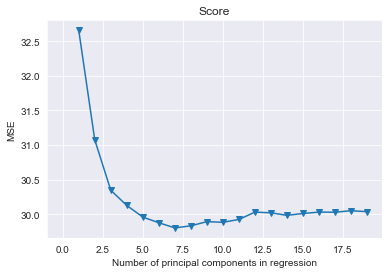

In [95]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [84]:
TE = pd.read_csv('Input/Aggregate/TEAggregate.csv')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Zach Ertz,1,PHI,11.111111,8.333333,75.0,87.666667,0.555556,7.9,10.5,0.000000,0.000000,0.0,0,21.8
Travis Kelce,2,KC,8.600000,5.700000,66.3,78.700000,0.600000,9.2,13.8,0.000000,0.000000,0.0,0,18.1
George Kittle,3,SF,7.100000,5.000000,70.4,77.500000,0.300000,10.9,15.5,0.000000,0.000000,0.0,0,15.4
Eric Ebron,4,IND,7.222222,4.333333,60.0,51.444444,1.000000,7.1,11.9,0.222222,0.111111,0.5,1,16.5
Jared Cook,5,OAK,6.555556,4.666667,71.2,60.666667,0.333333,9.3,13.0,0.000000,0.000000,0.0,0,13.4


In [85]:
TERZ = pd.read_csv('Input/RZ/TERZ.csv')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,1.777778,0.888889,50.0,9.555556,0.777778,5.4,10.8,0.222222,0.111111,0.5,0.111111,7.2
Travis Kelce,1.500000,0.900000,60.0,7.900000,0.500000,5.3,8.8,0.000000,0.000000,0.0,0.000000,4.7
Zach Ertz,1.888889,1.111111,58.8,7.333333,0.555556,3.9,6.6,0.000000,0.000000,0.0,0.000000,5.2
Trey Burton,1.000000,0.888889,88.9,4.666667,0.444444,4.7,5.2,0.111111,0.222222,2.0,0.000000,4.3
OJ Howard,0.777778,0.555556,71.4,5.555556,0.444444,7.1,10.0,0.000000,0.000000,0.0,0.000000,3.8


In [86]:
TEsnaps = pd.read_csv('Input/Aggregate/TESnaps.csv')
TEsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jordan Franks,CIN,TE,1,1,1.0,1.5,0.0,100.0,100.0,100.0,4.2,420.0
1,2,Erik Swoope,IND,TE,5,55,11.0,11.2,0.0,14.5,12.7,14.5,33.3,60.5
2,3,Eric Ebron,IND,TE,9,360,40.0,56.0,0.6,18.1,11.4,18.6,148.4,41.2
3,4,Seth DeValve,CLE,TE,7,39,5.6,7.8,0.0,10.3,7.7,10.3,14.4,36.9
4,5,Mo Alie-Cox,IND,TE,5,105,21.0,29.3,0.0,9.5,5.7,9.5,29.2,27.8


In [87]:
TEsnaps = TEsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
TEsnaps = TEsnaps.set_index('Name')

In [88]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
BAL,12.59
JAX,14.20
TEN,7.17
BUF,10.21
MIN,12.92


In [89]:
TESalaries = pd.read_csv('Input/Salaries/TESalaries.csv').dropna()
TESalaries = TESalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
TESalaries = TESalaries.set_index('Opponent')
TESalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
NO,Zach Ertz,PHI,6600.0,18.84
LAR,Travis Kelce,KC,6500.0,18.46
DET,Greg Olsen,CAR,5000.0,12.35
TEN,Jack Doyle,IND,4200.0,11.08
ARI,Jared Cook,OAK,3900.0,10.18


In [90]:
TESalaries = TESalaries.join(TEDef).join(QBDefense)
TESalaries = TESalaries.set_index('Team').join(Vegas).join(WROffense)
TESalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Ricky Seals-Jones,2900.0,8.09,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Jermaine Gresham,2600.0,2.91,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,John Phillips,2500.0,0.43,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ATL,Austin Hooper,4500.0,10.09,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111
ATL,Eric Saubert,2500.0,0.92,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111


In [91]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,8.09,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Jermaine Gresham,2600.0,2.91,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
John Phillips,2500.0,0.43,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Austin Hooper,4500.0,10.09,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111
Eric Saubert,2500.0,0.92,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111


In [92]:
TEs = TESalaries.join(TEavg).join(TERZ).join(TEsnaps).dropna()
TEs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,8.09,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.0,41.1,70.9,0.0,13.0,6.5,13.0,15.3
Jermaine Gresham,2600.0,2.91,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.3,29.6,48.8,0.0,3.4,2.9,3.4,5.7
John Phillips,2500.0,0.43,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.0,12.0,16.4,0.0,0.0,0.0,0.0,0.0
Austin Hooper,4500.0,10.09,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,0.0,3.6,56.3,82.0,0.0,10.8,9.1,10.8,21.3
Eric Saubert,2500.0,0.92,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,0.0,0.0,7.8,11.3,0.0,8.6,4.3,8.6,9.0


In [93]:
X_test = TEs[X_train.columns]
X_test

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,5.333333,2.666667,50.0,29.666667,0.111111,5.6,11.1,0.000000,0.000000,0.0,...,51.4,3.0,10.7,262,65.3,257.921324,8.9,13.6,2.331618,112
Jermaine Gresham,1.000000,0.857143,85.7,9.714286,0.000000,9.7,11.3,0.000000,0.000000,0.0,...,51.4,3.0,10.7,262,65.3,257.921324,8.9,13.6,2.331618,112
John Phillips,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,51.4,3.0,10.7,262,65.3,257.921324,8.9,13.6,2.331618,112
Austin Hooper,6.111111,5.111111,83.6,46.444444,0.333333,7.6,9.1,0.000000,0.000000,0.0,...,48.1,7.8,17.6,294,69.7,231.888889,7.1,10.2,1.333333,99
Eric Saubert,0.666667,0.333333,50.0,3.666667,0.000000,5.5,11.0,0.000000,0.000000,0.0,...,48.1,7.8,17.6,294,69.7,231.888889,7.1,10.2,1.333333,99
Logan Paulsen,0.555556,0.555556,100.0,5.666667,0.111111,10.2,10.2,0.000000,0.000000,0.0,...,48.1,7.8,17.6,294,69.7,231.888889,7.1,10.2,1.333333,99
Mark Andrews,3.555556,2.333333,65.6,27.111111,0.222222,7.6,11.6,0.000000,0.000000,0.0,...,68.6,5.4,14.4,368,66.8,313.333333,7.7,11.5,2.333333,97
Hayden Hurst,2.000000,0.800000,40.0,11.400000,0.200000,5.7,14.2,0.200000,0.000000,0.0,...,68.6,5.4,14.4,368,66.8,313.333333,7.7,11.5,2.333333,97
Maxx Williams,2.000000,2.000000,100.0,18.142857,0.000000,9.1,9.1,0.285714,1.142857,4.0,...,68.6,5.4,14.4,368,66.8,313.333333,7.7,11.5,2.333333,97


In [94]:
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

In [95]:
regr2 = RandomForestRegressor(n_estimators=146, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=50, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
TERFproj = regr2.predict(X_test)

In [96]:
TEs['PLSProjections'] = PLSProjections
TEs['RFProjections'] = TERFproj
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,8.09,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,41.1,70.9,0.0,13.0,6.5,13.0,15.3,8.858411,8.048692
Jermaine Gresham,2600.0,2.91,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.3,29.6,48.8,0.0,3.4,2.9,3.4,5.7,2.371582,3.683316
John Phillips,2500.0,0.43,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,12.0,16.4,0.0,0.0,0.0,0.0,0.0,0.646984,2.582106
Austin Hooper,4500.0,10.09,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,3.6,56.3,82.0,0.0,10.8,9.1,10.8,21.3,12.040461,9.978457
Eric Saubert,2500.0,0.92,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,7.8,11.3,0.0,8.6,4.3,8.6,9.0,2.950616,3.273329
Logan Paulsen,2500.0,0.61,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,1.1,26.4,38.5,0.0,2.1,2.1,2.1,6.8,2.750519,2.159040
Mark Andrews,2600.0,6.15,16.00,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,1.9,26.4,35.4,0.0,13.4,8.8,13.4,24.1,7.862349,6.304765
Hayden Hurst,2500.0,3.64,16.00,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,0.0,22.8,31.8,0.9,8.8,4.4,9.6,13.8,7.413813,5.231182
Maxx Williams,2500.0,2.92,16.00,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,0.6,33.0,34.3,0.9,6.1,6.9,6.9,11.9,6.914017,4.796927


In [109]:
TEs.to_csv('Projections/TEWeek12.csv')

In [97]:
TEScores = pd.read_csv('Scores/TEScores.csv')
TE = pd.DataFrame({'Name': [], 'Score': []})
TE['Name'] = TEScores['Name']
TE['Score'] = TEScores['FantasyPointsDraftKings']
TE = TE.set_index('Name')
TEs = TEs.join(TE)
TEs = TEs.dropna()
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,8.09,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,41.1,70.9,0.0,13.0,6.5,13.0,15.3,8.858411,8.048692,1.5
Jermaine Gresham,2600.0,2.91,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.6,48.8,0.0,3.4,2.9,3.4,5.7,2.371582,3.683316,1.8
John Phillips,2500.0,0.43,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,12.0,16.4,0.0,0.0,0.0,0.0,0.0,0.646984,2.582106,0.0
Austin Hooper,4500.0,10.09,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,56.3,82.0,0.0,10.8,9.1,10.8,21.3,12.040461,9.978457,6.7
Eric Saubert,2500.0,0.92,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,7.8,11.3,0.0,8.6,4.3,8.6,9.0,2.950616,3.273329,0.0
Logan Paulsen,2500.0,0.61,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,26.4,38.5,0.0,2.1,2.1,2.1,6.8,2.750519,2.159040,3.9
Mark Andrews,2600.0,6.15,16.00,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,26.4,35.4,0.0,13.4,8.8,13.4,24.1,7.862349,6.304765,2.9
Hayden Hurst,2500.0,3.64,16.00,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,22.8,31.8,0.9,8.8,4.4,9.6,13.8,7.413813,5.231182,0.0
Nick Boyle,2500.0,2.66,16.00,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,40.1,53.6,0.0,7.5,3.9,7.5,7.6,7.646678,5.193209,7.6


In [98]:
y_test = TEs.Score
y_pred = TEs.PLSProjections
mean_squared_error(y_test, y_pred)

31.713377069288885

In [99]:
y_test = TEs.Score
y_pred = TEs.RFProjections
mean_squared_error(y_test, y_pred)

27.951768290502812

In [100]:
y_test = TEs.Score
y_pred = TEs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

25.103097222222218

In [101]:
y_test = TEs.Score
y_pred = TEs.PointsGame
mean_squared_error(y_test, y_pred)

31.130277777777778

In [114]:
TEs = TEs.reset_index()
TEs = TEs[TEtrain.columns]
TEtrain = TEtrain.append(TEs, ignore_index=True, sort=False)
TEtrain.to_csv('TEtrain.csv')